In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import bar_chart_race as bcr
#import plotly.express as px

In [30]:
# Lê o arquivo 
arquivo1 = pd.read_excel('./Dados/importacoes-exportacoes-petroleo-2000-2023.xls')
arquivo1

ANO  MÊS   PRODUTO OPERAÇÃO COMERCIAL  IMPORTADO / EXPORTADO   
0    2000  ABR  PETRÓLEO         EXPORTAÇÃO           0.000000e+00  \
1    2000  AGO  PETRÓLEO         EXPORTAÇÃO           0.000000e+00   
2    2000  DEZ  PETRÓLEO         EXPORTAÇÃO           4.199504e+05   
3    2000  FEV  PETRÓLEO         EXPORTAÇÃO           6.853779e-02   
4    2000  JAN  PETRÓLEO         EXPORTAÇÃO           0.000000e+00   
..    ...  ...       ...                ...                    ...   
551  2022  SET  PETRÓLEO         IMPORTAÇÃO           1.630030e+06   
552  2023  FEV  PETRÓLEO         EXPORTAÇÃO           2.872574e+06   
553  2023  JAN  PETRÓLEO         EXPORTAÇÃO           7.183410e+06   
554  2023  FEV  PETRÓLEO         IMPORTAÇÃO           1.415934e+06   
555  2023  JAN  PETRÓLEO         IMPORTAÇÃO           1.785378e+06   

     DISPÊNDIO / RECEITA  
0                      0  
1                      0  
2               59930153  
3                     51  
4                      0  
..                   ...  
551           1043765015  
552           1199498348  
553           3146824339  
554            744182755  
555           1013577742  

[556 rows x 6 columns]

In [31]:
# Para obter as (n) primeiras linhas do arquivo usamos head(n)
print(arquivo1.head(5))

    ANO  MÊS   PRODUTO OPERAÇÃO COMERCIAL  IMPORTADO / EXPORTADO   
0  2000  ABR  PETRÓLEO         EXPORTAÇÃO               0.000000  \
1  2000  AGO  PETRÓLEO         EXPORTAÇÃO               0.000000   
2  2000  DEZ  PETRÓLEO         EXPORTAÇÃO          419950.420200   
3  2000  FEV  PETRÓLEO         EXPORTAÇÃO               0.068538   
4  2000  JAN  PETRÓLEO         EXPORTAÇÃO               0.000000   

   DISPÊNDIO / RECEITA  
0                    0  
1                    0  
2             59930153  
3                   51  
4                    0  


In [32]:
# Para obter as (n) ultimas linhas do arquivo usamos tail(n)
print(arquivo1.tail(5))

      ANO  MÊS   PRODUTO OPERAÇÃO COMERCIAL  IMPORTADO / EXPORTADO   
551  2022  SET  PETRÓLEO         IMPORTAÇÃO            1630029.820  \
552  2023  FEV  PETRÓLEO         EXPORTAÇÃO            2872573.620   
553  2023  JAN  PETRÓLEO         EXPORTAÇÃO            7183410.070   
554  2023  FEV  PETRÓLEO         IMPORTAÇÃO            1415933.786   
555  2023  JAN  PETRÓLEO         IMPORTAÇÃO            1785377.756   

     DISPÊNDIO / RECEITA  
551           1043765015  
552           1199498348  
553           3146824339  
554            744182755  
555           1013577742  


In [33]:
# Imprime as informações gerais do arquivo:
print(arquivo1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 556 entries, 0 to 555
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ANO                    556 non-null    int64  
 1   MÊS                    556 non-null    object 
 2   PRODUTO                556 non-null    object 
 3   OPERAÇÃO COMERCIAL     556 non-null    object 
 4   IMPORTADO / EXPORTADO  556 non-null    float64
 5   DISPÊNDIO / RECEITA    556 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 26.2+ KB
None


In [34]:
# Descreve algumas estatísticas basiscas do arquivo:
print(arquivo1.describe()) 

               ANO  IMPORTADO / EXPORTADO  DISPÊNDIO / RECEITA
count   556.000000           5.560000e+02         5.560000e+02
mean   2011.086331           2.296623e+06         9.184161e+08
std       6.692722           1.765387e+06         7.848334e+08
min    2000.000000           0.000000e+00         0.000000e+00
25%    2005.000000           1.166569e+06         3.262072e+08
50%    2011.000000           1.817641e+06         7.242666e+08
75%    2017.000000           2.689730e+06         1.287026e+09
max    2023.000000           9.705514e+06         4.569071e+09


In [35]:
# Mostra o número de valores únicos para cada coluna:
print(arquivo1.nunique()) 

ANO                       24
MÊS                       12
PRODUTO                    1
OPERAÇÃO COMERCIAL         2
IMPORTADO / EXPORTADO    551
DISPÊNDIO / RECEITA      551
dtype: int64


In [36]:
# Colocando o mês como primeira coluna e somando o numero de colunas
# Para usar uma coluna expecifica podemos usar (...).sum()['nomeDaColuna'])
pd.DataFrame(arquivo1.groupby(["MÊS", "ANO"]).sum())

PRODUTO    OPERAÇÃO COMERCIAL  IMPORTADO / EXPORTADO   
MÊS ANO                                                                   
ABR 2000  PETRÓLEOPETRÓLEO  EXPORTAÇÃOIMPORTAÇÃO           1.717434e+06  \
    2001  PETRÓLEOPETRÓLEO  EXPORTAÇÃOIMPORTAÇÃO           2.168592e+06   
    2002  PETRÓLEOPETRÓLEO  EXPORTAÇÃOIMPORTAÇÃO           3.157112e+06   
    2003  PETRÓLEOPETRÓLEO  EXPORTAÇÃOIMPORTAÇÃO           2.746016e+06   
    2004  PETRÓLEOPETRÓLEO  EXPORTAÇÃOIMPORTAÇÃO           3.164088e+06   
...                    ...                   ...                    ...   
SET 2018  PETRÓLEOPETRÓLEO  EXPORTAÇÃOIMPORTAÇÃO           7.121450e+06   
    2019  PETRÓLEOPETRÓLEO  EXPORTAÇÃOIMPORTAÇÃO           7.033625e+06   
    2020  PETRÓLEOPETRÓLEO  EXPORTAÇÃOIMPORTAÇÃO           6.012927e+06   
    2021  PETRÓLEOPETRÓLEO  EXPORTAÇÃOIMPORTAÇÃO           6.734117e+06   
    2022  PETRÓLEOPETRÓLEO  EXPORTAÇÃOIMPORTAÇÃO           8.135028e+06   

          DISPÊNDIO / RECEITA  
MÊS ANO                        
ABR 2000            323484334  
    2001            302220712  
    2002            443081106  
    2003            505066004  
    2004            699416332  
...                       ...  
SET 2018           3012655232  
    2019           2459735345  
    2020           1558814052  
    2021           2842241975  
    2022           4507921414  

[278 rows x 4 columns]

In [37]:
# Função unstack, desempilhamos os indices. 
# T - Transforma as linhas em colunas.
df_bcr_impor_expor = pd.DataFrame(arquivo1.groupby(["MÊS", "ANO"]).sum()['IMPORTADO / EXPORTADO']).unstack().T.droplevel(level=0)

In [38]:
bcr.bar_chart_race(df_bcr_impor_expor)

c:\Users\gumar\AppData\Local\Programs\Python\Python310\lib\site-packages\bar_chart_race\_make_chart.py:286: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(self.df_values.columns)
c:\Users\gumar\AppData\Local\Programs\Python\Python310\lib\site-packages\bar_chart_race\_make_chart.py:287: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([max_val] * len(ax.get_xticks()))


In [39]:
df_bcr_receita = pd.DataFrame(arquivo1.groupby(["MÊS", "ANO"]).sum()['DISPÊNDIO / RECEITA']).unstack().T.droplevel(level=0)

In [40]:
# Configurando a paleta de cores personalizada.
colors = ['red', 'blue', 'green', 'orange', 'purple', 'pink']
palette = plt.get_cmap('Paired', len(df_bcr_receita.columns))

bcr.bar_chart_race(df_bcr_receita, cmap=palette)

c:\Users\gumar\AppData\Local\Programs\Python\Python310\lib\site-packages\bar_chart_race\_make_chart.py:286: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(self.df_values.columns)
c:\Users\gumar\AppData\Local\Programs\Python\Python310\lib\site-packages\bar_chart_race\_make_chart.py:287: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([max_val] * len(ax.get_xticks()))


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (24, 2) + inhomogeneous part.

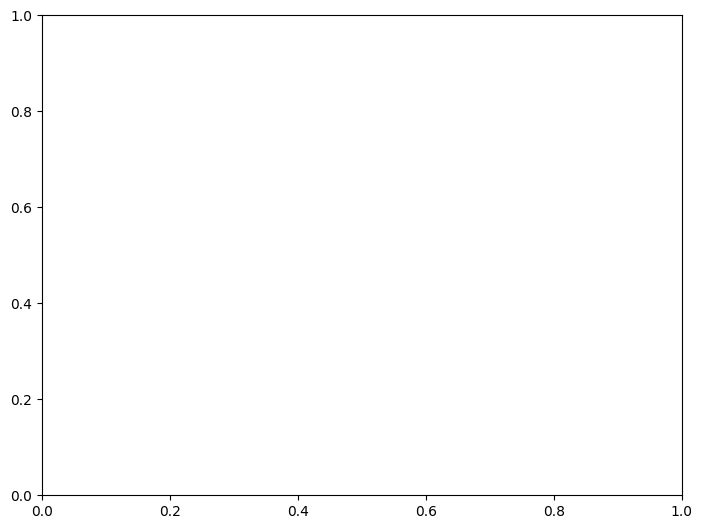